In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
print(x_train.shape[0], "x_train")
print(x_test.shape[0], "x_test")

60000 x_train
10000 x_test


In [ ]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [ ]:
# Data normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Further break training data into train / validation sets 
# Put 5000 into validation set and keep remaining 55 000 for train

(x_valid, x_train) = x_train[:5000], x_train[5000:]
(y_valid, y_train) = y_train[:5000], y_train[5000:]

In [ ]:
# Reshape input to 28,28,1
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape = (28,28,1)),
    MaxPooling2D(pool_size),
    Flatten(),
    Dense(10, activation = 'softmax'),
])


In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(x_train,
          to_categorical(y_train),
          epochs=3,
          validation_data=(x_valid, to_categorical(y_valid)))

Epoch 1/3
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7018 - accuracy: 0.7531 - val_loss: 0.4046 - val_accuracy: 0.8634
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4047 - accuracy: 0.8594 - val_loss: 0.3754 - val_accuracy: 0.8704
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3639 - accuracy: 0.8740 - val_loss: 0.3494 - val_accuracy: 0.8826


In [ ]:
# Predict model on first 5 images

predictions = model.predict (x_test[:5])

In [ ]:
print(np.argmax(predictions, axis=1))

[9 2 1 1 6]


In [ ]:
print(y_test[:5])

[9 2 1 1 6]


In [ ]:
# Add one more conv layer

model = Sequential([
                    Conv2D(num_filters, filter_size, input_shape=(28,28,1)),
                    Conv2D(num_filters, filter_size),
                    MaxPooling2D(pool_size),
                    Flatten(),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.fit(x_train,
          to_categorical(y_train),
          epochs=3,
          validation_data=(x_valid, to_categorical(y_valid))
          )

Epoch 1/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6607 - accuracy: 0.7677 - val_loss: 0.3986 - val_accuracy: 0.8644
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3821 - accuracy: 0.8666 - val_loss: 0.3623 - val_accuracy: 0.8802
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3424 - accuracy: 0.8780 - val_loss: 0.3408 - val_accuracy: 0.8854


In [ ]:
#dropout layers to protect from ovefitting
from tensorflow.keras.layers import Dropout

model = Sequential([
                    Conv2D(num_filters, filter_size, input_shape=(28,28,1)),
                    MaxPooling2D(pool_size),
                    Dropout(0.5),
                    Flatten(),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.fit(x_train,
          to_categorical(y_train),
          epochs=3,
          validation_data=(x_valid, to_categorical(y_valid))
          )

Epoch 1/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8002 - accuracy: 0.7153 - val_loss: 0.4191 - val_accuracy: 0.8582
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4633 - accuracy: 0.8353 - val_loss: 0.3821 - val_accuracy: 0.8694
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4234 - accuracy: 0.8483 - val_loss: 0.3695 - val_accuracy: 0.8734


In [ ]:
# Fully-connected layers
model = Sequential([
                    Conv2D(num_filters, filter_size, input_shape=(28,28,1)),
                    MaxPooling2D(pool_size),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.fit(x_train,
          to_categorical(y_train),
          epochs=3,
          validation_data=(x_valid, to_categorical(y_valid))
          )

Epoch 1/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6492 - accuracy: 0.7784 - val_loss: 0.3624 - val_accuracy: 0.8736
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3326 - accuracy: 0.8804 - val_loss: 0.3109 - val_accuracy: 0.8894
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2715 - accuracy: 0.9018 - val_loss: 0.2990 - val_accuracy: 0.8902


In [ ]:
# Changing conv2d parameters
num_filters = 8
filter_size = 3

model = Sequential([
  Conv2D(
    num_filters,
    filter_size,
    input_shape=(28, 28, 1),
    strides=2,
    padding='same',
    activation='relu',
  ),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [ ]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.fit(x_train,
          to_categorical(y_train),
          epochs=3,
          validation_data=(x_valid, to_categorical(y_valid))
          )

Epoch 1/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8791 - accuracy: 0.7102 - val_loss: 0.4520 - val_accuracy: 0.8414
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4438 - accuracy: 0.8409 - val_loss: 0.4222 - val_accuracy: 0.8546
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8548 - val_loss: 0.4001 - val_accuracy: 0.8610


In [ ]:
# More complex CNN model 

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)             

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# Saving the best weights
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [ ]:
model.fit(x_train,
         to_categorical(y_train),
         epochs=10,
         validation_data=(x_valid, to_categorical(y_valid)),
         callbacks=[checkpointer])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7478 - accuracy: 0.7237 - val_loss: 0.3429 - val_accuracy: 0.8750

Epoch 00001: val_loss improved from inf to 0.34285, saving model to model.weights.best.hdf5
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4122 - accuracy: 0.8488 - val_loss: 0.2979 - val_accuracy: 0.8926

Epoch 00002: val_loss improved from 0.34285 to 0.29789, saving model to model.weights.best.hdf5
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3497 - accuracy: 0.8715 - val_loss: 0.2688 - val_accuracy: 0.8994

Epoch 00003: val_loss improved from 0.29789 to 0.26879, saving model to model.weights.best.hdf5
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3255 - accuracy: 0.8800 - val_loss: 0.2573 - val_accuracy: 0.9016

Epoch 00004: val_loss improved from 0.26879 to 0.25734, saving model to model.weights.best.hdf5
Epoch 5/10
1719/1719 [==================

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, to_categorical(y_test), verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9097999930381775


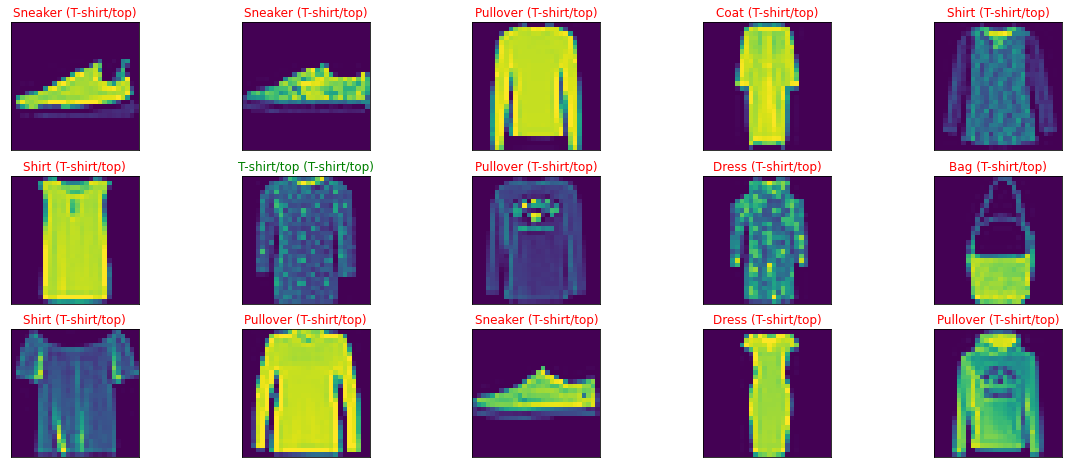

In [ ]:
#visualize prediction (first 15 examples)
y_hat = model.predict(x_test)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))